# Temporal Occupancy Calculation Notebook

Find out which single cell heatmaps actuallly occupy the temporal range stated on the graphs

In [162]:
import os, re
import numpy as np
import tifffile as tiff
from tqdm import tqdm
import matplotlib.pyplot as plt
import math
from pathlib import Path


In [2]:
single_cell_dir = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div'

In [4]:
apop_IDs = [i[:-16].split('_') for i in os.listdir(single_cell_dir) if 'N_cells' in i]
apop_IDs

[['GV0796', 'Pos5', '613'],
 ['GV0795', 'Pos4', '235'],
 ['GV0807', 'Pos5', '334'],
 ['GV0805', 'Pos5', '639'],
 ['GV0815', 'Pos11', '277'],
 ['GV0798', 'Pos20', '580'],
 ['GV0806', 'Pos4', '242'],
 ['GV0802', 'Pos5', '598'],
 ['GV0800', 'Pos16', '528'],
 ['GV0806', 'Pos5', '973'],
 ['GV0814', 'Pos0', '30'],
 ['GV0795', 'Pos3', '45'],
 ['GV0804', 'Pos5', '761'],
 ['GV0800', 'Pos6', '2'],
 ['GV0800', 'Pos16', '849'],
 ['GV0819', 'Pos5', '549'],
 ['GV0819', 'Pos3', '1735'],
 ['GV0820', 'Pos3', '377'],
 ['GV0806', 'Pos4', '156'],
 ['GV0800', 'Pos5', '453'],
 ['GV0798', 'Pos5', '407'],
 ['GV0797', 'Pos23', '301'],
 ['GV0818', 'Pos12', '323'],
 ['GV0796', 'Pos5', '858'],
 ['GV0801', 'Pos4', '580'],
 ['GV0798', 'Pos7', '123'],
 ['GV0798', 'Pos4', '27'],
 ['GV0796', 'Pos24', '1002'],
 ['GV0802', 'Pos3', '91'],
 ['GV0817', 'Pos11', '701'],
 ['GV0802', 'Pos4', '3'],
 ['GV0804', 'Pos4', '351'],
 ['GV0820', 'Pos3', '19'],
 ['GV0804', 'Pos5', '1274'],
 ['GV0795', 'Pos17', '13'],
 ['GV0794', 'Pos4'

In [5]:
movie_IDs = set([i[0]+'_'+i[1] for i in apop_IDs])
movie_IDs

{'GV0794_Pos4',
 'GV0794_Pos5',
 'GV0794_Pos6',
 'GV0794_Pos7',
 'GV0794_Pos8',
 'GV0795_Pos16',
 'GV0795_Pos17',
 'GV0795_Pos18',
 'GV0795_Pos3',
 'GV0795_Pos4',
 'GV0795_Pos5',
 'GV0795_Pos6',
 'GV0795_Pos7',
 'GV0795_Pos8',
 'GV0796_Pos19',
 'GV0796_Pos20',
 'GV0796_Pos21',
 'GV0796_Pos22',
 'GV0796_Pos23',
 'GV0796_Pos24',
 'GV0796_Pos3',
 'GV0796_Pos4',
 'GV0796_Pos5',
 'GV0796_Pos6',
 'GV0796_Pos7',
 'GV0796_Pos8',
 'GV0797_Pos18',
 'GV0797_Pos19',
 'GV0797_Pos20',
 'GV0797_Pos21',
 'GV0797_Pos22',
 'GV0797_Pos23',
 'GV0797_Pos3',
 'GV0797_Pos4',
 'GV0797_Pos5',
 'GV0797_Pos6',
 'GV0797_Pos7',
 'GV0797_Pos8',
 'GV0798_Pos18',
 'GV0798_Pos20',
 'GV0798_Pos21',
 'GV0798_Pos22',
 'GV0798_Pos23',
 'GV0798_Pos4',
 'GV0798_Pos5',
 'GV0798_Pos6',
 'GV0798_Pos7',
 'GV0798_Pos8',
 'GV0800_Pos15',
 'GV0800_Pos16',
 'GV0800_Pos17',
 'GV0800_Pos3',
 'GV0800_Pos4',
 'GV0800_Pos5',
 'GV0800_Pos6',
 'GV0800_Pos7',
 'GV0800_Pos8',
 'GV0801_Pos3',
 'GV0801_Pos4',
 'GV0801_Pos5',
 'GV0802_Pos3',
 

In [31]:
parent_dir = '/run/user/1000/gvfs/smb-share:server=lowe-sn00.biochem.ucl.ac.uk,share=lowegrp/Data/Giulia/'
mov_time_range = {}
missing_movies = []
for movie_ID in tqdm(movie_IDs):
    movie_dir = os.path.join(movie_ID.split('_')[0], movie_ID.split('_')[1], movie_ID.split('_')[1]+'_aligned')
    movie_path = os.path.join(parent_dir, movie_dir)
    len_movie = len([fn for fn in os.listdir(movie_path) if 'img_channel001_' in fn])
    mov_time_range[movie_ID] = len_movie

100%|██████████| 110/110 [01:21<00:00,  1.35it/s]


In [32]:
mov_time_range

{'GV0797_Pos23': 677,
 'GV0797_Pos4': 682,
 'GV0815_Pos23': 1190,
 'GV0820_Pos1': 1061,
 'GV0795_Pos7': 1183,
 'GV0813_Pos0': 1044,
 'GV0820_Pos2': 1062,
 'GV0804_Pos5': 1065,
 'GV0797_Pos21': 682,
 'GV0797_Pos20': 674,
 'GV0797_Pos19': 678,
 'GV0807_Pos3': 1176,
 'GV0795_Pos17': 1157,
 'GV0797_Pos7': 672,
 'GV0815_Pos11': 1193,
 'GV0798_Pos8': 965,
 'GV0795_Pos5': 1193,
 'GV0815_Pos0': 1190,
 'GV0806_Pos3': 1074,
 'GV0796_Pos22': 901,
 'GV0796_Pos7': 1002,
 'GV0802_Pos3': 1181,
 'GV0817_Pos23': 1189,
 'GV0797_Pos18': 678,
 'GV0798_Pos5': 965,
 'GV0794_Pos8': 955,
 'GV0805_Pos3': 1183,
 'GV0805_Pos5': 1188,
 'GV0819_Pos5': 1181,
 'GV0800_Pos17': 1165,
 'GV0814_Pos12': 1192,
 'GV0807_Pos4': 1171,
 'GV0796_Pos21': 996,
 'GV0797_Pos8': 671,
 'GV0800_Pos7': 1187,
 'GV0798_Pos20': 964,
 'GV0794_Pos7': 953,
 'GV0819_Pos0': 1196,
 'GV0795_Pos3': 1192,
 'GV0798_Pos4': 961,
 'GV0796_Pos24': 994,
 'GV0795_Pos4': 1184,
 'GV0800_Pos6': 1057,
 'GV0796_Pos6': 1000,
 'GV0795_Pos6': 1193,
 'GV0800_Pos

In [33]:
cell_type = 'RFP'
path_to_apop_lists = '/media/nathan/Transcend/Nathan/data/h2b/apoptosis_information/final/all'
expts_apop_lists = os.listdir(path_to_apop_lists)
apop_dict = {}
N_apops = len(expts_apop_lists)
for expt_apop_list in expts_apop_lists:
    apop_list = open(os.path.join(path_to_apop_lists, expt_apop_list), 'r')
    for apop_ID in apop_list:
        if cell_type in apop_ID:
            if 'stitched' not in apop_ID: ## relic of apoptosis finding (stitched = tracks that apoptosis switches into post apop)
                apop_dict[apop_ID.split()[0]] = apop_ID.split()[1]
orig_len_apops = len(apop_dict)
apop_dict

{'GV0804_Pos4_179_RFP': '625',
 'GV0804_Pos4_249_RFP': '850',
 'GV0804_Pos4_110_RFP': '851',
 'GV0804_Pos4_292_RFP': '902',
 'GV0804_Pos4_342_RFP': '999',
 'GV0804_Pos4_343_RFP': '1002',
 'GV0804_Pos4_231_RFP': '1010',
 'GV0804_Pos4_339_RFP': '1009',
 'GV0804_Pos4_333_RFP': '1014',
 'GV0804_Pos4_353_RFP': '1050',
 'GV0804_Pos4_351_RFP': '1084',
 'GV0804_Pos4_163_RFP': '1074',
 'GV0804_Pos4_217_RFP': '1142',
 'GV0794_Pos4_6_RFP': '469',
 'GV0794_Pos4_73_RFP': '773',
 'GV0794_Pos4_70_RFP': '820',
 'GV0794_Pos7_52_RFP': '195',
 'GV0794_Pos7_192_RFP': '258',
 'GV0794_Pos7_352_RFP': '749',
 'GV0794_Pos7_328_RFP': '827',
 'GV0794_Pos7_329_RFP': '846',
 'GV0794_Pos7_360_RFP': '874',
 'GV0794_Pos7_429_RFP': '889',
 'GV0795_Pos4_1_RFP': '6',
 'GV0795_Pos4_7_RFP': '8',
 'GV0795_Pos4_103_RFP': '472',
 'GV0795_Pos4_284_RFP': '639',
 'GV0795_Pos4_235_RFP': '642',
 'GV0795_Pos4_234_RFP': '671',
 'GV0795_Pos4_285_RFP': '654',
 'GV0795_Pos4_223_RFP': '418',
 'GV0795_Pos4_323_RFP': '956',
 'GV0795_Pos4

### Iterating through single cell numpy arrays

In [67]:
apop_ID = apop_IDs[0]

In [69]:
for i,j in enumerate(apop_dict):
    if i<1:
        apop_ID = j
    

In [163]:
heatmap_errors = []
count = 0
for apop_ID in apop_dict:

    apop_time = int(apop_dict[apop_ID])

    movie_ID = apop_ID.split('_')[0]+'_'+apop_ID.split('_')[1]
    if movie_ID in mov_time_range:
        movie_length = mov_time_range[movie_ID]
        count+=1
        if movie_length-apop_time < 800/2:
            print("Movie len=", movie_length, " apop_time=", apop_time, " remaining time after apop=", movie_length-apop_time)
            heatmap_errors.append((apop_ID, movie_length, apop_time))
        if apop_time <800/2:
            print("Apop_time=", apop_time,apop_ID)
            heatmap_errors.append((apop_ID, movie_length, apop_time))

Movie len= 1162  apop_time= 850  remaining time after apop= 312
Movie len= 1162  apop_time= 851  remaining time after apop= 311
Movie len= 1162  apop_time= 902  remaining time after apop= 260
Movie len= 1162  apop_time= 999  remaining time after apop= 163
Movie len= 1162  apop_time= 1002  remaining time after apop= 160
Movie len= 1162  apop_time= 1010  remaining time after apop= 152
Movie len= 1162  apop_time= 1009  remaining time after apop= 153
Movie len= 1162  apop_time= 1014  remaining time after apop= 148
Movie len= 1162  apop_time= 1050  remaining time after apop= 112
Movie len= 1162  apop_time= 1084  remaining time after apop= 78
Movie len= 1162  apop_time= 1074  remaining time after apop= 88
Movie len= 1162  apop_time= 1142  remaining time after apop= 20
Movie len= 956  apop_time= 773  remaining time after apop= 183
Movie len= 956  apop_time= 820  remaining time after apop= 136
Apop_time= 195 GV0794_Pos7_52_RFP
Apop_time= 258 GV0794_Pos7_192_RFP
Movie len= 953  apop_time= 749  

Apop_time= 295 GV0800_Pos5_155_RFP
Movie len= 1188  apop_time= 805  remaining time after apop= 383
Movie len= 1188  apop_time= 831  remaining time after apop= 357
Movie len= 1188  apop_time= 911  remaining time after apop= 277
Movie len= 1188  apop_time= 915  remaining time after apop= 273
Movie len= 1188  apop_time= 915  remaining time after apop= 273
Movie len= 1188  apop_time= 989  remaining time after apop= 199
Movie len= 1188  apop_time= 983  remaining time after apop= 205
Movie len= 1188  apop_time= 1014  remaining time after apop= 174
Movie len= 1188  apop_time= 1112  remaining time after apop= 76
Movie len= 1188  apop_time= 1132  remaining time after apop= 56
Movie len= 1188  apop_time= 1134  remaining time after apop= 54
Movie len= 1188  apop_time= 1137  remaining time after apop= 51
Movie len= 1188  apop_time= 1077  remaining time after apop= 111
Movie len= 1188  apop_time= 1098  remaining time after apop= 90
Movie len= 1188  apop_time= 998  remaining time after apop= 190
Mov

Movie len= 1193  apop_time= 1029  remaining time after apop= 164
Apop_time= 42 GV0795_Pos6_41_RFP
Movie len= 1193  apop_time= 1175  remaining time after apop= 18
Movie len= 1193  apop_time= 821  remaining time after apop= 372
Apop_time= 343 GV0795_Pos6_184_RFP
Movie len= 1193  apop_time= 965  remaining time after apop= 228
Movie len= 1193  apop_time= 1038  remaining time after apop= 155
Movie len= 1193  apop_time= 861  remaining time after apop= 332
Movie len= 1193  apop_time= 917  remaining time after apop= 276
Movie len= 1193  apop_time= 985  remaining time after apop= 208
Movie len= 1193  apop_time= 894  remaining time after apop= 299
Movie len= 1193  apop_time= 1075  remaining time after apop= 118
Movie len= 1193  apop_time= 1145  remaining time after apop= 48
Movie len= 1193  apop_time= 1169  remaining time after apop= 24
Movie len= 1193  apop_time= 805  remaining time after apop= 388
Movie len= 1193  apop_time= 806  remaining time after apop= 387
Movie len= 1193  apop_time= 885  

In [62]:
count ## ie the total number of heatmaps i have raw data for

1839

In [63]:
len(heatmap_errors) ## ie heatmaps that need editing

1467

# Editing the single cell heatmaps

In [154]:
t_range = 800
num_bins = 20

In [155]:
heatmap_errors[0][1]

1162

In [157]:
heatmap_ID = heatmap_errors[0][0]

In [177]:
heatmap_ID

'GV0794_Pos7_52_RFP'

In [193]:
for entry in heatmap_errors:
    print(entry[2])

850
851
902
999
1002
1010
1009
1014
1050
1084
1074
1142
773
820
195
258
749
827
846
874
889
6
8
956
955
385
826
835
833
857
900
880
905
950
1022
1006
1047
1080
177
807
809
809
789
832
920
921
937
859
962
1010
1008
1080
279
280
635
646
666
692
694
695
698
835
777
793
809
800
822
942
861
20
2
1
17
131
204
617
612
627
834
647
710
761
679
697
725
627
735
780
815
864
870
789
811
104
111
157
145
171
154
164
186
269
299
299
152
156
207
207
211
222
216
233
233
274
222
300
300
283
283
294
294
304
304
316
316
330
330
347
347
344
344
476
477
492
539
579
559
642
623
601
99
201
254
388
388
398
398
393
393
424
405
487
473
486
625
475
475
516
2
39
679
701
724
751
163
164
123
587
661
684
782
741
804
778
751
31
235
264
802
812
870
928
891
924
951
1017
1025
1136
1136
1116
1
12
169
164
302
801
804
808
1020
1005
1005
14
7
59
117
770
784
815
844
869
876
891
954
980
1100
991
71
131
136
244
272
343
642
679
719
720
763
740
769
737
798
794
860
869
863
894
911
890
225
524
524
532
503
569
618
634
670
671
701
701

In [199]:
for entry in heatmap_errors:
    heatmap_ID = entry[0]
    path_singlecell_heatmap = os.path.join(single_cell_dir, heatmap_ID+'_N_events.npy')
    heatmap = np.load(path_singlecell_heatmap)
    movie_length, apop_time = entry[1], entry[2]
    time_remaining = movie_length - apop_time
    frames_per_bin = t_range/num_bins
    save_location = os.path.join(single_cell_dir, 'temporal_occupancy_adjusted')
    Path(save_location).mkdir(parents=True, exist_ok=True)
    if time_remaining < t_range/2:
        excess_frames = t_range/2 - time_remaining
        excess_bins = math.ceil(excess_frames / frames_per_bin)
        heatmap[:,-excess_bins:] = np.nan
        fn = os.path.join(save_location,heatmap_ID+'_N_events.npy')
        np.save(fn, heatmap)
        print(fn, "saved out")
    if apop_time < t_range/2:
        excess_frames = (t_range/2)- apop_time
        excess_bins = math.ceil(excess_frames / frames_per_bin)
        heatmap[:,:excess_bins] = np.nan
        fn = os.path.join(save_location,heatmap_ID+'_N_events.npy')
        np.save(fn, heatmap)
        print(fn, "saved out")

/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0804_Pos4_249_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0804_Pos4_110_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0804_Pos4_292_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0804_Pos4_342_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0804_Pos4_343_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/i

/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0797_Pos4_64_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0797_Pos4_46_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0797_Pos4_41_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0797_Pos4_157_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0797_Pos4_63_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/indiv

/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0798_Pos21_13_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0801_Pos4_14_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0801_Pos4_25_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0801_Pos4_149_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0801_Pos4_10_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/indi

/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0796_Pos6_579_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0796_Pos6_542_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0796_Pos6_881_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0796_Pos6_7_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0796_Pos6_638_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/ind

/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0805_Pos5_1300_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0805_Pos5_1398_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0805_Pos5_1397_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0805_Pos5_1469_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0805_Pos5_891_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_outp

/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0798_Pos23_995_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0798_Pos23_697_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0798_Pos23_1268_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0798_Pos23_1233_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0798_Pos23_1224_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_

/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0815_Pos0_714_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0815_Pos0_516_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0815_Pos0_158_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0815_Pos0_498_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0815_Pos0_685_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/i

/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0795_Pos5_295_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0795_Pos5_904_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0795_Pos5_172_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0795_Pos5_1000_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0795_Pos6_41_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/i

/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0817_Pos12_53_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0817_Pos12_771_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0817_Pos12_1001_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0817_Pos12_951_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0817_Pos12_789_RFP_N_events.npy saved out
/home/nathan/data/kraken/h2b/giulia/radial_analysis_out

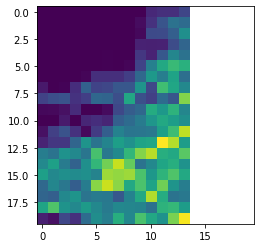

In [197]:
hm = np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0794_Pos4_73_RFP_N_cells.npy')
plt.imshow(hm)

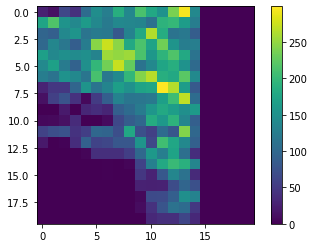

In [201]:
hm = np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/GV0794_Pos4_73_RFP_N_cells.npy')
plt.imshow(np.flipud(hm))
plt.colorbar()